# Sprint 深層学習スクラッチ ニューラルネットワーク

## 1. このSprintについて

### Sprintの目的
- スクラッチを通してニューラルネットワークの基礎を理解する
- 画像データの扱い方を知る

### どのように学ぶか
スクラッチで単純なニューラルネットワークを実装した後、学習と検証を行なっていきます。

In [1]:
import numpy as np

## 2. MNISTデータセット

ニューラルネットワークスクラッチの検証にはMNISTデータセットを使用します。各種ライブラリやサイトからダウンロードできますが、ここでは深層学習フレームワークのKerasを用います。以下のコードを実行すればデータセットをダウンロードし、展開まで行えます。

**《データセットをダウンロードするコード》**

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**《MNISTとは？》**

画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには訓練用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかというラベルが含まれています。

**《画像データとは？》**

デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。

### データセットの確認

どういったデータなのかを見てみます。

**《サンプルコード》**

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

### 平滑化

(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、 **平滑化（flatten）** してあるという風に表現します。

**《サンプルコード》**

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

**《補足》**

ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

### 画像データの可視化

画像データを可視化します。`plt.imshow`に渡します。

**《サンプルコード》**

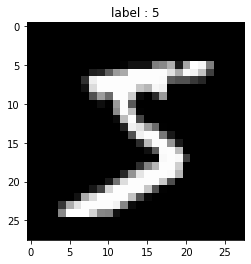

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

[numpy.reshape — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

[matplotlib.pyplot.imshow — Matplotlib 3.1.1 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

**《発展的話題》**

画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、`plt.imshow`はより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。

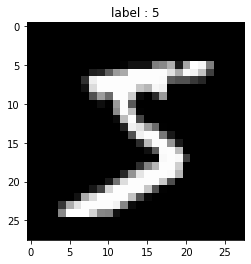

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

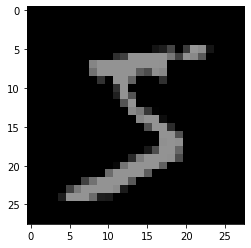

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

### 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

**《サンプルコード》**

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には **one-hot**表現 に変換します。scikit-learnの`OneHotEncoder`を使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

**《サンプルコード》**

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


[sklearn.preprocessing.OneHotEncoder — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。

**《サンプルコード》**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, y_train.shape) # (48000, 784)
print(X_val.shape, y_val.shape) # (12000, 784)

(48000, 784) (48000,)
(12000, 784) (12000,)


## 3. ニューラルネットワークスクラッチ

ニューラルネットワークのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を学びます。次のSprintで層を自由に変えられる設計にしていきます。

以下に雛形を用意してあります。このScratchSimpleNeuralNetrowkClassifierクラスにコードを書き加えていってください。

### ミニバッチ処理

これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する **確率的勾配降下法** が一般的です。分割した際のひとかたまりを **ミニバッチ** 、そのサンプル数を **バッチサイズ** と呼びます。


今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 **イテレーション（iteration）** すると呼びます。訓練データを一度全て見ると1回の **エポック（epoch）** が終わったことになります。このエポックを複数回繰り返し、学習が完了します。

これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

**《コード》**

In [11]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

このクラスをインスタンス化し、for文を使うことでミニバッチが取り出せます。

In [12]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([0, 3, 6, 6, 5, 2, 3, 6, 7, 3, 6, 5, 9, 6, 7, 7, 3, 5, 4, 6],
      dtype=uint8))


`__getitem__`や`__next__`は`__init__`と同じ特殊メソッドの一種です。

### 学習
ニューラルネットワークの学習はフォワードプロパゲーションとバックプロパゲションの繰り返しになります。

### 【問題1】重みの初期値を決めるコードの作成

ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。

重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。

以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

**《サンプルコード》**

In [13]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

[numpy.random.randn — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randn.html)

In [14]:
def _init_weight_bias(n_row, n_column, sigma=0.01):
    """
    n_row : int
      行数
    n_column : int
    　　列数
    sigma : float
    　　ガウス分布の標準偏差
    return
    　　標準偏差sigmaに従うガウス分布　shape(n_row, n_column), shape(n_column, )
    """
    return sigma * np.random.randn(n_row, n_column), sigma * np.random.randn(n_column)

In [15]:
for i in _init_weight_bias(n_features, n_nodes1):
    print(i.shape)

(784, 400)
(400,)


- 以下のScratch_classへ実装

### 【問題2】フォワードプロパゲーションの実装

三層のニューラルネットワークの **フォワードプロパゲーション** を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

In [16]:
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）

「1層目」
$$
A_1 = X \cdot W_1 + B_1
$$
$X$ : 特徴量ベクトル (batch_size, n_features)

$W_1$ : 1層目の重み (n_features, n_nodes1)

$B_1$ : 1層目のバイアス (n_nodes1,)

$A_1$ : 出力 (batch_size, n_nodes1)

「1層目の活性化関数」
$$
Z_1 = f(A_1)
$$
$f()$ : 活性化関数

$Z_1$ 出力 (batch_size, n_nodes1)

「2層目」
$$
A_2 = Z_1 \cdot W_2 + B_2
$$

$W_2$ : 2層目の重み (n_nodes1, n_nodes2)

$B_2$ : 2層目のバイアス (n_nodes2,)

$A_2$ : 出力 (batch_size, n_nodes2)

「2層目の活性化関数」
$$
Z_2 = f(A_2)
$$
$f()$ : 活性化関数

$Z_2$ 出力 (batch_size, n_nodes2)

「3層目（出力層）」
$$
A_3 = Z_2 \cdot W_3 + B_3
$$

$W_3$ : 3層目の重み (n_nodes2, output)

$B_3$ : 3層目のバイアス (n_output,)

$A_3$ : 出力 (batch_size, n_output)

「3層目の活性化関数」
$$
Z_3 = softmax(A_3)
$$
$softmax()$ : ソフトマックス関数

$Z_3$ 出力 (batch_size, n_output)

$Z_3$ は各ラベル（0〜9）に対する確率の配列である。

### 活性化関数（フォワードプロバゲーション）

活性化関数を作成し、フォワードプロパゲーションの中で使用します。切り替えられるように実装することを推奨しますが、片方でも構いません。

「シグモイド関数」
$$
f(Z) = sigmoid(A) = \frac{1}{1+exp(-A)}
$$
指数関数 $exp(-A)$ の計算は`np.exp`を使用してください。

[numpy.exp — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html)

「ハイパボリックタンジェント関数」

次の数式で表されますが、`np.tanh`ひとつで実現できます。
$$
f(Z) = tanh(A) = \frac{exp(A) - exp(-A)}{exp(A) + exp(-A)}
$$

[numpy.tanh — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.tanh.html)

＊現在ではこれらの代わりにReLUと呼ばれる活性化関数が一般的です。次のSprintで扱います。

In [17]:
def _sigmoid_forward(A):
    return 1.0 / (1.0 + np.exp(-A))

In [18]:
def _tanh_forward(A):
    return np.tanh(A)

- 以下のScratch_classへ実装

### ソフトマックス関数
ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用します。これも活性化関数の一種ですが、多クラス分類の出力層で使われる特性上、区別して扱われることが多いです。

次の数式です。
$$
Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n_c}exp(A_{3\_i})}
$$

$Z_{3_k}$ : $k$ 番目のクラスの確率ベクトル (batch_size,)

$A_{3_k}$ : $k$ 番目のクラスにあたる前の層からのベクトル (batch_size,)

$n_c$ : クラスの数、n_output。今回のMNISTでは10。

分母は全てのクラスに相当する値を指数関数に通した上で足し合わせたものです。その中で、分子に $k$ 番目のクラスを持ってくることで、 $k$ 番目のクラスである確率が求まります。

これを10クラス分計算し、合わせたものが $Z_3$ です。

In [19]:
a = np.arange(12).reshape(4, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [20]:
a.sum(axis=1)[:, np.newaxis]

array([[ 3],
       [12],
       [21],
       [30]])

In [21]:
a / a.sum(axis=1)[:, np.newaxis]

array([[0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667],
       [0.28571429, 0.33333333, 0.38095238],
       [0.3       , 0.33333333, 0.36666667]])

In [22]:
def _softmax_forward(A):
    exp_A = np.exp(A)
    return exp_A / exp_A.sum(axis=1)[:, np.newaxis]

In [23]:
_softmax_forward(a)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

- 以下のScratch_classへ実装

### 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。

多クラス分類の目的関数である交差エントロピー誤差 $L$ は次の数式です。
$$
L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})
$$

$y_{ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）

$z_{3_ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの確率（スカラー）

$n_{b}$ : バッチサイズ、batch_size

$n_{c}$ : クラスの数、n_output（今回のMNISTでは10）

サンプル1つあたりの誤差が求まります。

In [24]:
a = np.arange(1, 13).reshape(4, -1)
b = np.array([[0, 0,1], [0, 1, 0], [0,0,1], [0,1,0]])
a, b

(array([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]),
 array([[0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0]]))

In [25]:
(a * b).sum()

28

In [26]:
def _cross_entropy_error(Z, y_label, batch_size):
    log_Z = np.log(Z)
    return -(log_Z * y_label).sum() / batch_size

In [27]:
_cross_entropy_error(a, b, 4)

-1.8257925128092

- 以下のScratch_classへ実装

### 【問題4】バックプロパゲーションの実装

三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。

数式を以下に示します。

まず、i層目の重みとバイアスの更新式です。 $W_i$ と $B_i$ に対し、更新後の $W_i^{\prime}$ と $B_i^{\prime}$ は次の数式で求められます。
$$
W_i^{\prime} = W_i - \alpha \frac{\partial L}{\partial W_i} \\
B_i^{\prime} = B_i - \alpha \frac{\partial L}{\partial B_i}
$$
$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）

$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配

$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配

＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。

この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。

勾配 $\frac{\partial L}{\partial W_i}$ や $\frac{\partial L}{\partial B_i}$ を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。

「3層目」
$$
\frac{\partial L}{\partial A_3} = Z_{3} - Y\\
\frac{\partial L}{\partial B_3} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{3\_j}}\\
\frac{\partial L}{\partial W_3} = Z_{2}^{T}\cdot \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T
$$

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)

$\frac{\partial L}{\partial A_{3_j}}$ : j番目のサンプルの$A_3$ に関する損失 $L$ の勾配 (n_nodes2,)

$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (n_output,)

$\frac{\partial L}{\partial W_3}$ : $W_3$ に関する損失 $L$ の勾配 (n_nodes2, n_output)

$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_output)

$Y$ : 正解ラベル (batch_size, n_output)

$Z_{2}$ : 2層目の活性化関数の出力 (batch_size, n_nodes2)

$W_3$ : 3層目の重み (n_nodes2, n_output)

「2層目」
$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-tanh^2(A_{2})\}\\
\frac{\partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2\_j}}\\
\frac{\partial L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}\\
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T
$$

$\frac{\partial L}{\partial A_2}$ : $A_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$\frac{\partial L}{\partial A_{2_j}}$ : j番目のサンプルの$A_2$ に関する損失 $L$ の勾配 (n_nodes2,)

$\frac{\partial L}{\partial B_2}$ : $B_2$ に関する損失 $L$ の勾配 (n_output,)

$\frac{\partial L}{\partial W_2}$ : $W_2$ に関する損失 $L$ の勾配 (n_nodes1, n_nodes2)

$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$A_2$ : 2層目の出力 (batch_size, n_nodes2)

$Z_{1}$ : 1層目の活性化関数の出力 (batch_size, n_nodes1)

$W_2$ : 2層目の重み (n_nodes1, n_nodes2)

「1層目」
$$
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-tanh^2(A_{1})\}\\
\frac{\partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{1\_j}}\\
\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}\\
$$

$\frac{\partial L}{\partial A_1}$ : $A_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)

$\frac{\partial L}{\partial A_{1_j}}$ : j番目のサンプルの$A_1$ に関する損失 $L$ の勾配 (n_nodes1,)

$\frac{\partial L}{\partial B_1}$ : $B_1$ に関する損失 $L$ の勾配 (n_output,)

$\frac{\partial L}{\partial W_1}$ : $W_1$ に関する損失 $L$ の勾配 (n_features, n_nodes1)

$\frac{\partial L}{\partial Z_1}$ : $Z_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)

$A_1$ : 1層目の出力 (batch_size, n_nodes1)

$X$ : 特徴量ベクトル (batch_size, n_features)

$W_1$ : 1層目の重み (n_features, n_nodes1)

**《補足》**

活性化関数にシグモイド関数を使用した場合は、次のようになります。
$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot  \{1-sigmoid(A_{2})\}sigmoid(A_{2})
\\
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot  \{1-sigmoid(A_{1})\}sigmoid(A_{1})
$$

- 以下のScratch_classへ実装

### 【問題5】推定
推定を行うメソッドを作成してください。

フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

[numpy.argmax — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)

In [28]:
index_array = np.array([0, 1, 1, 0, 2, 3])
category = np.array([0, 10, 20, 30])
category[index_array]

array([ 0, 10, 10,  0, 20, 30])

- 以下のScratch_classへ実装

**実装したスクラッチ**

In [29]:
from copy import deepcopy
import numpy as np
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, verbose=False, random_state=None, activation='sigmoid', epoch=10, batch_size=20, lr=0.0001, hidden_layer_sizes=(400, 200,)):
        self.verbose = verbose
        # 学習率
        self.lr = lr
        # 層のノード数のタプル
        self.hidden_layer_sizes = hidden_layer_sizes
        # バッチサイズ
        self.batch_size = batch_size
        # epochの回数
        self.epoch = epoch
        # 活性化関数の名前　'sigmoid', 'tanh'
        self.activation = activation
        # 乱数の設定
        self.random_state = random_state
        # 出力クラス数
        self.n_output = None
        # 出力カテゴリの配列
        self.categories_ = None
        # 重みの情報リスト
        self.coefs_ = None
        self.intercepts_ = None
        # epoch毎に損失を記録
        self.losses = np.zeros(self.epoch)
        self.val_losses = None
        # fitの時にvalデータがあるフラグ
        self.val_flag = None
    
    # 重みの初期値を決めるコード
    def _init_weight_bias(self, n_row, n_column, sigma=0.01):
        """
        n_row : int 行数
        n_column : int 列数
        sigma : float ガウス分布の標準偏差
        returns
          標準偏差sigmaに従うガウス分布　shape(n_row, n_column), shape(n_column, )
        """
        return sigma * np.random.randn(n_row, n_column), sigma * np.random.randn(n_column)
    
    # 活性化関数
    def _sigmoid_forward(self, A):
        return 1.0 / (1.0 + np.exp(-A))
    
    def _tanh_forward(self, A):
        return np.tanh(A)
    
    def _softmax_forward(self, A):
        # オーバーフローを防ぐ
        A -= np.max(A)
        exp_A = np.exp(A)
        return exp_A / exp_A.sum(axis=1)[:, np.newaxis]
    
    def _sigmoid_back(self, A):
        # 合ってる？
        return (1.0 - self._sigmoid_forward(A)) * self._sigmoid_forward(A)
    
    def _tanh_back(self, A):
        return 1.0 - np.power(self._tanh_forward(A), 2)
    
    # 損失関数
    def _cross_entropy_error(self, Z, y_one_hot):
        return -(np.log(Z) * y_one_hot).sum() / self.batch_size
    

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        
        Parameters
        ----------
        X_train : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y_train : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # random_stateが設定されている場合はseed設定
        if type(self.random_state) == int:
            np.random.seed(self.random_state)
        
        # 変数情報
        self.n_samples, self.n_features = X_train.shape
        # valデータの確認
        if type(X_val) == np.ndarray and type(y_val) == np.ndarray:
            if X_val.shape == (y_val.shape[0], self.n_features):
                self.val_flag = True
                self.val_losses = np.zeros(self.epoch)
        
        # 目的変数をone_hot_encoding
        from sklearn.preprocessing import OneHotEncoder
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
        if self.val_flag:
            y_val_one_hot = enc.transform(y_val[:, np.newaxis])
        
        # 出力カテゴリの配列
        self.categories_ = enc.categories_[0]
        # 出力クラス数を特定
        self.n_output = len(self.categories_)
        
        # 重みを初期化
        self.coefs_, self.intercepts_ = [], []
        row = self.n_features
        for n_nodes in list(self.hidden_layer_sizes) + [self.n_output]:
            weight, bias = self._init_weight_bias(row, n_nodes)
            self.coefs_.append(weight)
            self.intercepts_.append(bias)
            row = n_nodes
        
        # epoch　でループ
        for n_epoch in range(self.epoch):
            # 各々のバッチの損失の記録
            batches_losses = np.zeros(self.n_samples // self.batch_size, dtype=np.float64)
            if self.val_flag:
                batches_val_losses = np.zeros(self.n_samples // self.batch_size, dtype=np.float64)
            
            # バッチを取り出し、バッチでループ
            get_mini_batch = GetMiniBatch(X_train, y_train_one_hot, batch_size=self.batch_size)
            for mini_X_train, mini_y_train in get_mini_batch:
                
                # forward propagation
                #　全結合層、活性化関数の出力層の結果をリストで管理
                affine_layer, act_func_layer = [], [mini_X_train]
                # 活性化関数の出力結果をself.Zで管理
                self.Z = mini_X_train
                if self.val_flag:
                    self.Z_val = X_val
                
                # 各層をループ
                n_layer = 0
                for _ in range(len(self.hidden_layer_sizes)):
                    
                    A = np.dot(self.Z, self.coefs_[n_layer]) + self.intercepts_[n_layer]
                    if self.val_flag:
                        A_val = np.dot(self.Z_val, self.coefs_[n_layer]) + self.intercepts_[n_layer]
                    n_layer += 1
                    # self.activationに応じて計算
                    if self.activation == 'sigmoid':
                        self.Z = self._sigmoid_forward(A)
                        if self.val_flag:
                            self.Z_val = self._sigmoid_forward(A_val)
                    elif self.activation == 'tanh':
                        self.Z = self._tanh_forward(A)
                        if self.val_flag:
                            self.Z_val = self._tanh_forward(A_val)
                    else:
                        print('not proper activation name')
                        break
                    # A, self.Z　をdeepcopyしてリストへ保管　（deepcopy必要？）
                    affine_layer.append(deepcopy(A))
                    act_func_layer.append(deepcopy(self.Z))
                
                # 最後の出力層
                A = np.dot(self.Z, self.coefs_[n_layer]) + self.intercepts_[n_layer]
                if self.val_flag:
                    A_val = np.dot(self.Z_val, self.coefs_[n_layer]) + self.intercepts_[n_layer]
                # ソフトマックス関数
                self.Z = self._softmax_forward(A)
                if self.val_flag:
                    self.Z_val = self._softmax_forward(A_val)
                # A, self.Z　をdeepcopyしてリストへ保管　（deepcopy必要？）
                # affine_layer.append(deepcopy(A)) 計算に使わないので保管しない、追加するとあとの挙動に影響
                act_func_layer.append(deepcopy(self.Z))
                
                # 損失計算
                loss = self._cross_entropy_error(self.Z, mini_y_train)
                batches_losses[get_mini_batch._counter - 1] = loss
                if self.val_flag:
                    val_loss = self._cross_entropy_error(self.Z_val, y_val_one_hot)
                    batches_val_losses[get_mini_batch._counter - 1] = val_loss
                
                # back propagation
                # 重みを更新するために各層の勾配を計算した結果をリストで管理（逆順）
                coefs_gradient, intercepts_gradient = [], []
                
                # affineに関する損失の勾配を求める、最後のZを取り出して正解ラベルをひく
                affine_loss_gradient = act_func_layer.pop() - mini_y_train
                
                # バイアスに関する損失の勾配を行方向に足して求める
                loss_intercepts = affine_loss_gradient.sum(axis=0)
                intercepts_gradient.append(deepcopy(loss_intercepts))
                
                # 重みに関する損失の勾配をZを使って求める
                loss_coefs = np.dot(act_func_layer.pop().T, affine_loss_gradient)
                coefs_gradient.append(deepcopy(loss_coefs))
                
                # hidden_layer_sizesの数だけループ
                for i in range(len(self.hidden_layer_sizes)):
                    # Zに関する損失の勾配を求める
                    loss_act_func = np.dot(affine_loss_gradient, self.coefs_[-(i+1)].T)
                    # affineに関する損失の勾配を更新, self.activationに応じて計算
                    if self.activation == 'sigmoid':
                        affine_loss_gradient = loss_act_func * self._sigmoid_back(affine_layer.pop())
                    elif self.activation == 'tanh':
                        affine_loss_gradient = loss_act_func * self._tanh_back(affine_layer.pop())
                    
                    # バイアスに関する損失の勾配を行方向に足して求める
                    loss_intercepts = affine_loss_gradient.sum(axis=0)
                    intercepts_gradient.append(deepcopy(loss_intercepts))
                    
                    # 重みに関する損失の勾配をZを使って求める
                    loss_coefs = np.dot(act_func_layer.pop().T, affine_loss_gradient)
                    coefs_gradient.append(deepcopy(loss_coefs))
                
                # 重みのリストを更新
                for i in range(len(self.hidden_layer_sizes)+1):
                    self.coefs_[i] = self.coefs_[i] - self.lr * coefs_gradient[-(i+1)]
                    self.intercepts_[i] = self.intercepts_[i] - self.lr * intercepts_gradient[-(i+1)]
            
            #　バッチのループが終わったら損失を合計し、記録
            self.losses[n_epoch] = batches_losses.sum()
            if self.val_flag:
                self.val_losses[n_epoch] = batches_val_losses.sum()
        
            #verboseをTrueにした際は学習過程などを出力する
            if self.verbose:
                print('epoch : {} finished'.format(n_epoch))
                print('train_loss : {}'.format(self.losses[n_epoch]))
                print('val_loss : {}'.format(self.val_losses[n_epoch]))
                
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        # 活性化関数の出力結果をpredで管理
        pred = X

        # 各層をループ
        n_layer = 0
        for _ in range(len(self.hidden_layer_sizes)):

            A = np.dot(pred, self.coefs_[n_layer]) + self.intercepts_[n_layer]
            n_layer += 1
            # self.activationに応じて計算
            if self.activation == 'sigmoid':
                pred = self._sigmoid_forward(A)
            elif self.activation == 'tanh':
                pred = self._tanh_forward(A)

        # 最後の出力層
        A = np.dot(pred, self.coefs_[n_layer]) + self.intercepts_[n_layer]
        # ソフトマックス関数
        pred = self._softmax_forward(A)
        
        # 列、横方向に最大のインデックスを取得し、出力カテゴリのself.categories_の値を返す
        return self.categories_[np.argmax(pred, axis=1)]

## 4. 検証

### 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [30]:
import time

In [31]:
'''
# scratchしたクラスで学習
start = time.time()
scratch = ScratchSimpleNeuralNetrowkClassifier(epoch=20, lr=0.1, batch_size=20, hidden_layer_sizes=(400,200), random_state=0, activation='sigmoid')
scratch.fit(X_train, y_train, X_test, y_test)
print("time : {:,.1f}[s]".format(time.time() - start))
'''

'\n# scratchしたクラスで学習\nstart = time.time()\nscratch = ScratchSimpleNeuralNetrowkClassifier(epoch=20, lr=0.1, batch_size=20, hidden_layer_sizes=(400,200), random_state=0, activation=\'sigmoid\')\nscratch.fit(X_train, y_train, X_test, y_test)\nprint("time : {:,.1f}[s]".format(time.time() - start))\n'

In [32]:
'''
# scratchした学習器を保存
import pickle
with open('Scratch_NNC_clf_Sprint9', 'wb') as f:
    pickle.dump(scratch, f)
'''

"\n# scratchした学習器を保存\nimport pickle\nwith open('Scratch_NNC_clf_Sprint9', 'wb') as f:\n    pickle.dump(scratch, f)\n"

In [33]:
# 学習器を呼び出す
import pickle
with open('Scratch_NNC_clf_Sprint9', 'rb') as f:
    saved_scratch_clf = pickle.load(f)

In [34]:
scratch_pred = saved_scratch_clf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy_score : {}'.format(accuracy_score(y_test, scratch_pred)))

Accuracy_score : 0.979


In [36]:
# start = time.time()
# from sklearn.neural_network import MLPClassifier
# sklearn = MLPClassifier(batch_size=20, hidden_layer_sizes=(400, 200), random_state=0)
# print("time : {:,.1f}[s]".format(time.time() - start))

### 【問題7】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
# 損失関数のプロット
def loss_plot(clf):
    plt.plot(range(clf.epoch), clf.losses, label='train_loss')
    if clf.val_flag:
        plt.plot(range(clf.epoch), clf.val_losses, label='val_loss')
    plt.xlabel('n_epoch')
    plt.title('model_loss')
    plt.legend();

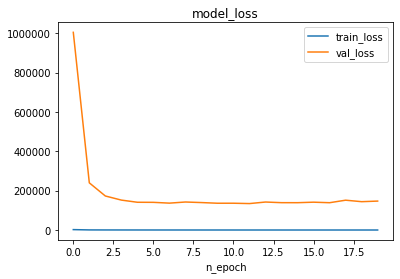

In [38]:
loss_plot(saved_scratch_clf)

- train_lossの推移がわからないので、ylimを調整してそれぞれの損失推移を図示

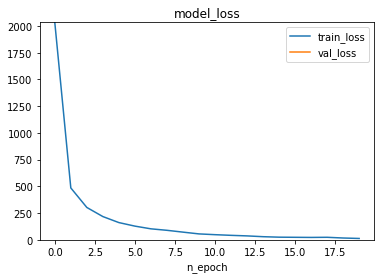

In [39]:
plt.ylim(0, saved_scratch_clf.losses.max())
loss_plot(saved_scratch_clf)

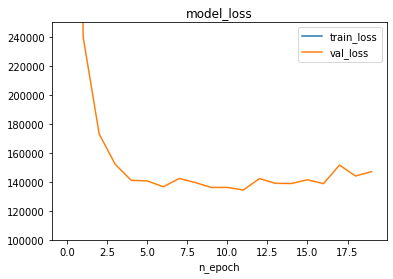

In [40]:
plt.ylim(10*10e3, 25*10e3)
loss_plot(saved_scratch_clf)

- train_loss, val_loss　ともに下落していることは見て取れる
- 若干val_lossが上昇しているようにも見えるので過学習が進んでいるのか？

- MNISTデータセットでは、学習に多大な時間がかかるので、別のデータセットを準備して、確認してみる

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y,random_state=1)

In [42]:
start = time.time()
scratch2 = ScratchSimpleNeuralNetrowkClassifier(verbose=True, lr=0.1, epoch=50, batch_size=5, hidden_layer_sizes=(15,10), random_state=1)
scratch2.fit(X_train2, y_train2, X_test2, y_test2)
print("time : {:,.1f}[s]".format(time.time() - start))

epoch : 0 finished
train_loss : 10.862017030990323
val_loss : 56.68946736178189
epoch : 1 finished
train_loss : 10.734925655698614
val_loss : 56.49017451682092
epoch : 2 finished
train_loss : 10.673880393611627
val_loss : 56.18065632766649
epoch : 3 finished
train_loss : 10.627627302169259
val_loss : 55.91983717796023
epoch : 4 finished
train_loss : 10.592460800746451
val_loss : 55.69510826037131
epoch : 5 finished
train_loss : 10.565666480426056
val_loss : 55.497935953559946
epoch : 6 finished
train_loss : 10.545220732403173
val_loss : 55.322365678408794
epoch : 7 finished
train_loss : 10.529578414112043
val_loss : 55.16403693838159
epoch : 8 finished
train_loss : 10.51751414993056
val_loss : 55.019487804708284
epoch : 9 finished
train_loss : 10.507986405792312
val_loss : 54.88557847770246
epoch : 10 finished
train_loss : 10.499990007154484
val_loss : 54.75886480878684
epoch : 11 finished
train_loss : 10.492346454921764
val_loss : 54.63468823590727
epoch : 12 finished
train_loss : 10.

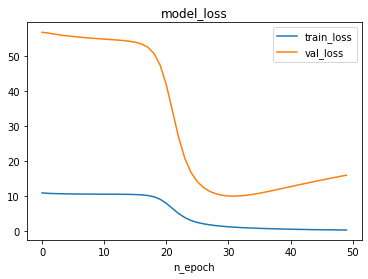

In [43]:
loss_plot(scratch2)

- 損失が下落していることが確認できる
- n_epoch30回あたりから、val_lossが上昇しているので、過学習が進んでしまっていることがわかる

- sklearnと予測の比較

In [44]:
start = time.time()
sklearn2 = MLPClassifier(batch_size=5, hidden_layer_sizes=(15,10), random_state=1).fit(X_train2, y_train2)
sklearn2.fit(X_train2, y_train2)
print("time : {:,.1f}[s]".format(time.time() - start))

time : 1.1[s]


In [45]:
scratch2.predict(X_test2) == sklearn2.predict(X_test2)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

- sklearnと予測値が同値であるので、正しくscratchできているように思われる

### 【問題8】（アドバンス課題）誤分類の確認
誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

**《コード》**

In [46]:
def miss_class_imshow(y_pred, y_val, X_val, num, n_columns = 6):
    """
    誤分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

    Parameters:
    ----------
    y_pred : 推定値のndarray (n_samples,)
    y_val : 検証データの正解ラベル(n_samples,)
    X_val : 検証データの特徴量（n_samples, n_features)
    num : 表示する数
    n_columns = 10 : 表示する列数
    """
    import numpy as np
    import matplotlib.pyplot as plt
    true_false = y_pred==y_val
    false_list = np.where(true_false==False)[0].astype(np.int)
    if false_list.shape[0] < num:
        num = false_list.shape[0]
    fig = plt.figure(figsize=(16, (num-1//n_columns + 1)*(16 / n_columns)))
    fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
    for i in range(num):
        ax = fig.add_subplot(num-1//n_columns + 1, n_columns, i + 1, xticks=[], yticks=[])
        ax.set_title("pred:{} / ans:{}".format(y_pred[false_list[i]],y_val[false_list[i]]))
        ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

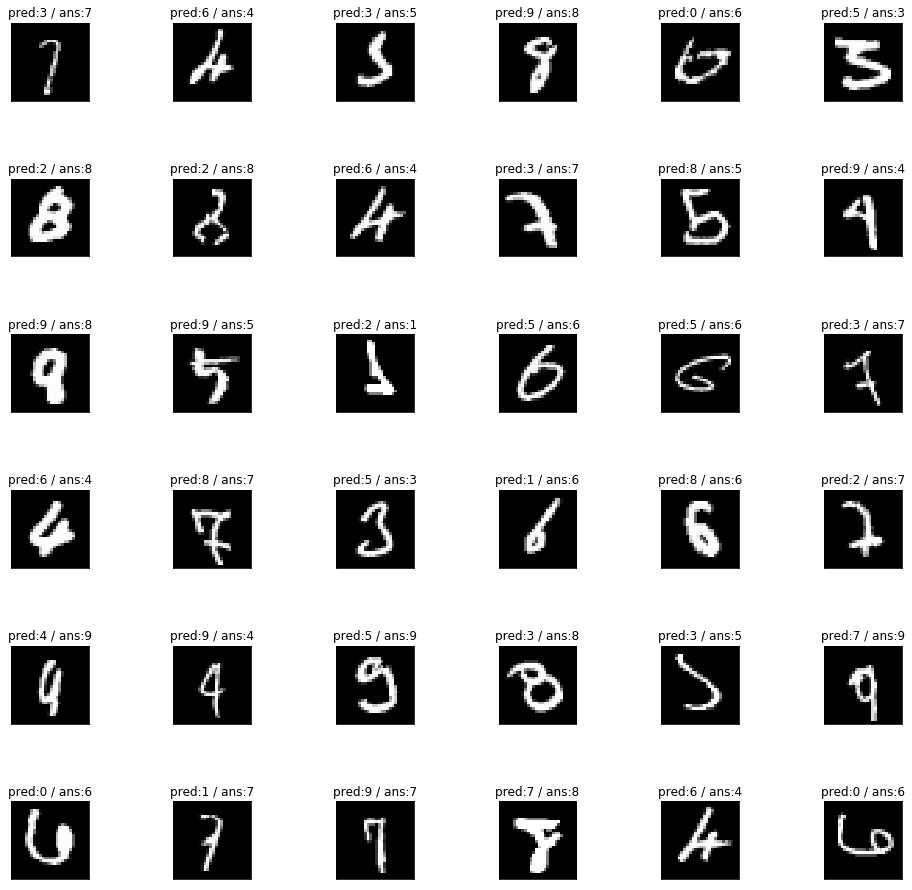

In [47]:
miss_class_imshow(scratch_pred, y_test, X_test, num=36)